In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/01_Jan.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,13.500000,77.000000,1,1,0,1549.0,1613.0,1699.0,1511.0,1495.0,1376.0,124.166667,1490.0
1,13.441667,78.083333,1,1,0,1521.0,1629.0,1662.0,1487.0,1454.0,1248.0,245.333333,1454.0
2,13.383333,79.166667,1,1,0,1526.0,1618.0,1644.0,1476.0,1429.0,1205.0,366.250000,1451.0
3,13.325000,80.250000,1,1,0,1519.0,1588.0,1621.0,1450.0,1271.0,1183.0,483.416667,1406.0
4,13.266667,81.333333,2,1,0,1490.0,1549.0,1613.0,1420.0,1282.0,1150.0,601.250000,1414.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,11.412452,84.203770,23,4,1,1925.0,1956.0,2072.0,1832.0,1849.0,1620.0,1936.500000,1787.0
8636,11.412452,84.203770,24,4,1,1904.0,1948.0,2046.0,1793.0,1817.0,1587.0,1913.833333,1774.0
8637,11.412452,84.203770,24,4,1,1877.0,1947.0,2016.0,1730.0,1771.0,1562.0,1891.416667,1747.0
8638,11.312452,84.203770,24,4,1,1871.0,1977.0,1984.0,1702.0,1716.0,1517.0,1867.833333,1701.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   int64  
 3   B       8640 non-null   int64  
 4   C       8640 non-null   int64  
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 877.6 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   float64
 3   B       8640 non-null   float64
 4   C       8640 non-null   float64
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(13)
memory usage: 877.6 KB


In [6]:
train = stlf_data.copy()[stlf_data.index <= 7200][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.895505,0.053450,0.297926,-1.660891,-1.445126,-1.372959,-0.677102,-0.440014,-0.121653,-0.809766,-0.876373,-1.326237,-6.161528
1,-1.028463,0.038063,0.362886,-1.660891,-1.445126,-1.372959,-0.780486,-0.380947,-0.258227,-0.898901,-1.029162,-1.798292,-5.696933
2,-1.039543,0.022677,0.427846,-1.660891,-1.445126,-1.372959,-0.762025,-0.421555,-0.324668,-0.939755,-1.122326,-1.956873,-5.233296
3,-1.205739,0.007291,0.492807,-1.660891,-1.445126,-1.372959,-0.787871,-0.532304,-0.409564,-1.036319,-1.711123,-2.038008,-4.784038
4,-1.176193,-0.008095,0.557767,-1.516446,-1.445126,-1.372959,-0.894947,-0.676278,-0.439094,-1.147738,-1.670131,-2.159709,-4.332224


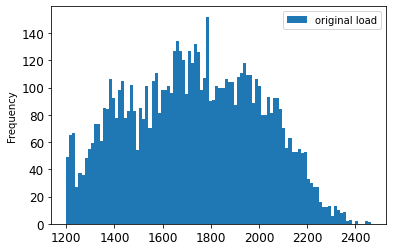

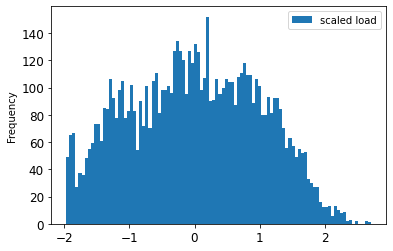

In [8]:
stlf_data[stlf_data.index <= 7200][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 7200][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

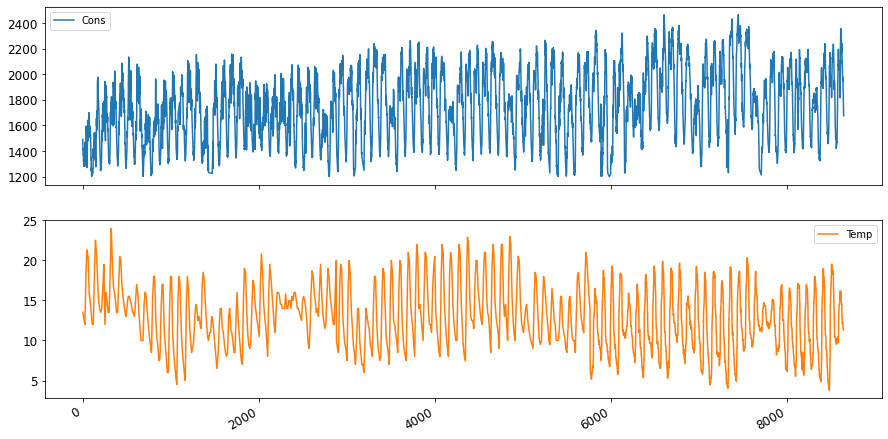

In [9]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [10]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-0.895505,0.053450,0.297926,-1.660891,-1.445126,-1.372959,-0.677102,-0.440014,-0.121653,-0.809766,-0.876373,-1.326237,-6.161528,-1.804048
1,-1.028463,0.038063,0.362886,-1.660891,-1.445126,-1.372959,-0.780486,-0.380947,-0.258227,-0.898901,-1.029162,-1.798292,-5.696933,-1.962858
2,-1.039543,0.022677,0.427846,-1.660891,-1.445126,-1.372959,-0.762025,-0.421555,-0.324668,-0.939755,-1.122326,-1.956873,-5.233296,-1.959165
3,-1.205739,0.007291,0.492807,-1.660891,-1.445126,-1.372959,-0.787871,-0.532304,-0.409564,-1.036319,-1.711123,-2.038008,-4.784038,-1.952042
4,-1.176193,-0.008095,0.557767,-1.516446,-1.445126,-1.372959,-0.894947,-0.676278,-0.439094,-1.147738,-1.670131,-2.159709,-4.332224,-1.944919
5,-1.327617,-0.023482,0.622727,-1.516446,-1.445126,-1.372959,-1.027869,-0.779643,-0.380035,-1.329723,-1.409272,-2.141270,-3.893510,-1.937796
6,-1.323924,-0.038868,0.687688,-1.516446,-1.445126,-1.372959,-1.038946,-0.761185,-0.420638,-1.437429,-1.442811,-2.045384,-3.454477,-1.930674
7,-1.390402,-0.054254,0.752648,-1.516446,-1.445126,-1.372959,-1.205099,-0.787027,-0.531373,-1.530278,-1.509889,-2.167085,-3.021196,-1.923551
8,-1.456881,-0.069641,0.817608,-1.372000,-1.445126,-1.372959,-1.175560,-0.894084,-0.675329,-1.444857,-1.576967,-2.174461,-2.593666,-1.916428
9,-1.519667,-0.085027,0.882569,-1.372000,-1.445126,-1.372959,-1.326944,-1.026983,-0.778681,-1.519136,-1.617959,-1.613896,-2.171568,-1.909306


In [11]:
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-0.895505,0.053450,0.297926,-1.660891,-1.445126,-1.372959,-0.677102,-0.440014,-0.121653,-0.809766,-0.876373,-1.326237,-6.161528,-1.804048
1,-1.028463,0.038063,0.362886,-1.660891,-1.445126,-1.372959,-0.780486,-0.380947,-0.258227,-0.898901,-1.029162,-1.798292,-5.696933,-1.962858
2,-1.039543,0.022677,0.427846,-1.660891,-1.445126,-1.372959,-0.762025,-0.421555,-0.324668,-0.939755,-1.122326,-1.956873,-5.233296,-1.959165
3,-1.205739,0.007291,0.492807,-1.660891,-1.445126,-1.372959,-0.787871,-0.532304,-0.409564,-1.036319,-1.711123,-2.038008,-4.784038,-1.952042
4,-1.176193,-0.008095,0.557767,-1.516446,-1.445126,-1.372959,-0.894947,-0.676278,-0.439094,-1.147738,-1.670131,-2.159709,-4.332224,-1.944919
5,-1.327617,-0.023482,0.622727,-1.516446,-1.445126,-1.372959,-1.027869,-0.779643,-0.380035,-1.329723,-1.409272,-2.141270,-3.893510,-1.937796
6,-1.323924,-0.038868,0.687688,-1.516446,-1.445126,-1.372959,-1.038946,-0.761185,-0.420638,-1.437429,-1.442811,-2.045384,-3.454477,-1.930674
7,-1.390402,-0.054254,0.752648,-1.516446,-1.445126,-1.372959,-1.205099,-0.787027,-0.531373,-1.530278,-1.509889,-2.167085,-3.021196,-1.923551
8,-1.456881,-0.069641,0.817608,-1.372000,-1.445126,-1.372959,-1.175560,-0.894084,-0.675329,-1.444857,-1.576967,-2.174461,-2.593666,-1.916428
9,-1.519667,-0.085027,0.882569,-1.372000,-1.445126,-1.372959,-1.326944,-1.026983,-0.778681,-1.519136,-1.617959,-1.613896,-2.171568,-1.909306


In [12]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7191,0.777542,-0.581577,-0.573181,1.372462,-0.441572,0.728354,0.947501,1.494401,1.938019,0.883810,-0.060256,0.414466,1.239086,NaN
7192,0.759076,-0.581577,-0.573181,1.516907,-0.441572,0.728354,0.825656,1.402110,1.716549,0.790960,-0.194413,0.278013,1.156328,NaN
7193,0.651971,-0.581577,-0.573181,1.516907,-0.441572,0.728354,0.818271,1.180612,1.583667,0.601547,-0.272670,0.237445,1.075806,NaN
7194,0.522707,-0.792590,-0.376625,1.516907,-0.441572,0.728354,0.954885,0.999722,1.565211,0.553265,-0.331364,0.204254,0.985699,NaN
7195,0.456228,-1.003602,-0.180069,1.516907,-0.441572,0.728354,0.777656,0.948039,1.495079,0.441846,-0.390057,0.156311,0.895911,NaN
7196,0.371283,-1.003602,-0.180069,1.661353,-0.441572,0.728354,0.759195,0.826216,1.402800,0.319285,-0.448750,-0.076029,0.806763,NaN
7197,0.227246,-1.003602,-0.180069,1.661353,-0.441572,0.728354,0.652118,0.818832,1.181329,0.181867,-0.507444,-0.201418,0.724324,NaN
7198,-0.064522,-1.312207,-0.180069,1.661353,-0.441572,0.728354,0.522889,0.955423,1.000462,-0.018688,-0.854014,-0.275177,0.632300,NaN
7199,-0.156853,-1.312207,0.163197,1.661353,-0.441572,0.728354,0.456428,0.778224,0.948786,-0.200673,-0.889416,-0.459573,0.536761,NaN
7200,-0.319357,-1.312207,0.163197,-1.660891,0.060205,0.728354,0.371505,0.759766,0.826977,-0.300950,-0.924819,-0.599715,0.437707,NaN


In [13]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.dropna(how='any')

In [14]:
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7091,0.895726,-0.879632,-0.153693,1.228016,-0.943349,0.728354,1.394267,1.848797,1.908490,-0.011260,0.409290,0.845954,1.584816,0.777542
7092,0.840327,-0.879632,-0.153693,1.372462,-0.943349,0.728354,1.320421,1.723282,2.004460,-0.078111,0.293767,0.517728,1.484164,0.759076
7093,0.829248,-0.879632,-0.153693,1.372462,-0.943349,0.728354,1.209653,1.568233,1.941710,-0.037258,0.278861,0.410778,1.387986,0.651971
7094,0.917886,-1.011515,-0.005804,1.372462,-0.943349,0.728354,0.866271,1.531317,1.956475,-0.040972,0.427923,0.735316,1.298198,0.522707
7095,0.866180,-1.143397,0.142084,1.372462,-0.943349,0.728354,0.895809,1.394727,1.849431,-0.055828,0.439103,0.580423,1.213204,0.456228
7096,0.773849,-1.143397,0.142084,1.516907,-0.943349,0.728354,0.840425,1.320894,1.723931,-0.189531,0.301220,0.576735,1.131085,0.371283
7097,0.585492,-1.143397,0.142084,1.516907,-0.943349,0.728354,0.829348,1.210145,1.568902,-0.267525,0.260228,0.488225,1.046090,0.227246
7098,0.537480,-1.233077,0.216225,1.516907,-0.943349,0.728354,0.917963,0.866824,1.531991,-0.326020,0.226689,0.539856,0.960137,-0.064522
7099,0.426682,-1.322757,0.290367,1.516907,-0.943349,0.728354,0.866271,0.896357,1.395417,-0.384515,0.178244,0.296452,0.876420,-0.156853
7100,0.304805,-1.322757,0.290367,1.661353,-0.943349,0.728354,0.773964,0.840982,1.321594,-0.443010,-0.056530,0.185814,0.788550,-0.319357


In [15]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
0,-1.804048
1,-1.962858
2,-1.959165
3,-1.952042
4,-1.944919
...,...
7096,0.371283
7097,0.227246
7098,-0.064522
7099,-0.156853


In [16]:
X_train = train_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.895505,0.053450,0.297926,-1.660891,-1.445126,-1.372959,-0.677102,-0.440014,-0.121653,-0.809766,-0.876373,-1.326237,-6.161528
1,-1.028463,0.038063,0.362886,-1.660891,-1.445126,-1.372959,-0.780486,-0.380947,-0.258227,-0.898901,-1.029162,-1.798292,-5.696933
2,-1.039543,0.022677,0.427846,-1.660891,-1.445126,-1.372959,-0.762025,-0.421555,-0.324668,-0.939755,-1.122326,-1.956873,-5.233296
3,-1.205739,0.007291,0.492807,-1.660891,-1.445126,-1.372959,-0.787871,-0.532304,-0.409564,-1.036319,-1.711123,-2.038008,-4.784038
4,-1.176193,-0.008095,0.557767,-1.516446,-1.445126,-1.372959,-0.894947,-0.676278,-0.439094,-1.147738,-1.670131,-2.159709,-4.332224
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7096,0.773849,-1.143397,0.142084,1.516907,-0.943349,0.728354,0.840425,1.320894,1.723931,-0.189531,0.301220,0.576735,1.131085
7097,0.585492,-1.143397,0.142084,1.516907,-0.943349,0.728354,0.829348,1.210145,1.568902,-0.267525,0.260228,0.488225,1.046090
7098,0.537480,-1.233077,0.216225,1.516907,-0.943349,0.728354,0.917963,0.866824,1.531991,-0.326020,0.226689,0.539856,0.960137
7099,0.426682,-1.322757,0.290367,1.516907,-0.943349,0.728354,0.866271,0.896357,1.395417,-0.384515,0.178244,0.296452,0.876420


In [17]:
valid = stlf_data.copy()[(stlf_data.index >=7201) & (stlf_data.index <=8161)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,1618.0,8.322452,74.75315,1.0,4.0,1.0,1794.0,1909.0,1954.0,1617.0,1463.0,1550.0,1817.250000
7202,1585.0,8.462452,74.25769,1.0,4.0,1.0,1715.0,1874.0,1991.0,1599.0,1437.0,1535.0,1783.416667
7203,1584.0,8.602452,73.76223,1.0,4.0,1.0,1690.0,1856.0,1943.0,1559.0,1408.0,1514.0,1753.500000
7204,1553.0,8.602452,73.76223,2.0,4.0,1.0,1646.0,1833.0,1938.0,1553.0,1356.0,1488.0,1721.416667
7205,1521.0,8.602452,73.76223,2.0,4.0,1.0,1618.0,1794.0,1909.0,1518.0,1367.0,1478.0,1689.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8157,1739.0,8.272452,88.70196,24.0,6.0,1.0,1848.0,1936.0,2010.0,1674.0,1723.0,1418.0,1879.916667
8158,1677.0,8.002452,88.70196,24.0,6.0,1.0,1855.0,1928.0,1976.0,1651.0,1666.0,1396.0,1855.000000
8159,1646.0,8.002452,89.59910,24.0,6.0,1.0,1827.0,1920.0,1950.0,1604.0,1629.0,1432.0,1829.666667
8160,1623.0,8.002452,89.59910,1.0,7.0,0.0,1778.0,1881.0,1921.0,1603.0,1568.0,1431.0,1804.833333


In [18]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,-0.763225,-0.964551,-0.266810,-1.658081,-0.170444,0.657412,-0.179731,0.201613,0.350276,-0.794510,-1.281010,-0.958048,-0.107112
7202,-0.872855,-0.927161,-0.295892,-1.658081,-0.170444,0.657412,-0.442336,0.085261,0.473252,-0.853892,-1.365096,-1.006847,-0.224316
7203,-0.876177,-0.889771,-0.324974,-1.658081,-0.170444,0.657412,-0.525439,0.025422,0.313716,-0.985851,-1.458885,-1.075164,-0.327953
7204,-0.979163,-0.889771,-0.324974,-1.513750,-0.170444,0.657412,-0.671700,-0.051038,0.297097,-1.005645,-1.627056,-1.159749,-0.439094
7205,-1.085471,-0.889771,-0.324974,-1.513750,-0.170444,0.657412,-0.764776,-0.180688,0.200711,-1.121110,-1.591482,-1.192281,-0.551102
7206,-1.078826,-0.967222,-0.320583,-1.513750,-0.170444,0.657412,-0.874472,-0.443313,0.084382,-1.107914,-1.688504,-1.192281,-0.652429
7207,-1.078826,-1.044672,-0.316191,-1.513750,-0.170444,0.657412,-0.877796,-0.526422,0.024556,-1.091419,-1.759654,-1.234573,-0.748559
7208,-1.082149,-1.044672,-0.316191,-1.369419,-0.170444,0.657412,-0.980844,-0.672694,-0.051889,-1.140904,-1.801697,-1.341930,-0.838339
7209,-1.161880,-1.044672,-0.316191,-1.369419,-0.170444,0.657412,-1.087215,-0.765776,-0.181512,-1.239873,-1.811399,-1.348436,-0.923788
7210,-1.211711,-1.020635,-0.212206,-1.369419,-0.170444,0.657412,-1.080567,-0.875480,-0.444083,-1.414720,-1.791994,-1.387475,-0.990762


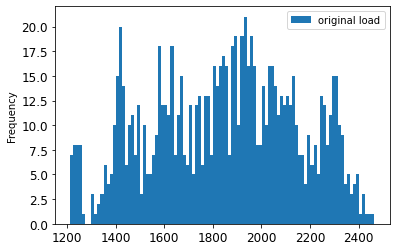

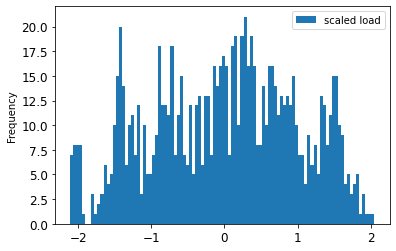

In [19]:
stlf_data[(stlf_data.index >=7201) & (stlf_data.index <=8161)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=7201) & (valid.index <=8161)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [20]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7201,-0.763225,-0.964551,-0.266810,-1.658081,-0.170444,0.657412,-0.179731,0.201613,0.350276,-0.794510,-1.281010,-0.958048,-0.107112,-0.700104
7202,-0.872855,-0.927161,-0.295892,-1.658081,-0.170444,0.657412,-0.442336,0.085261,0.473252,-0.853892,-1.365096,-1.006847,-0.224316,-0.720037
7203,-0.876177,-0.889771,-0.324974,-1.658081,-0.170444,0.657412,-0.525439,0.025422,0.313716,-0.985851,-1.458885,-1.075164,-0.327953,-0.799768
7204,-0.979163,-0.889771,-0.324974,-1.513750,-0.170444,0.657412,-0.671700,-0.051038,0.297097,-1.005645,-1.627056,-1.159749,-0.439094,-0.816379
7205,-1.085471,-0.889771,-0.324974,-1.513750,-0.170444,0.657412,-0.764776,-0.180688,0.200711,-1.121110,-1.591482,-1.192281,-0.551102,-0.842956
7206,-1.078826,-0.967222,-0.320583,-1.513750,-0.170444,0.657412,-0.874472,-0.443313,0.084382,-1.107914,-1.688504,-1.192281,-0.652429,-1.028995
7207,-1.078826,-1.044672,-0.316191,-1.513750,-0.170444,0.657412,-0.877796,-0.526422,0.024556,-1.091419,-1.759654,-1.234573,-0.748559,-0.945941
7208,-1.082149,-1.044672,-0.316191,-1.369419,-0.170444,0.657412,-0.980844,-0.672694,-0.051889,-1.140904,-1.801697,-1.341930,-0.838339,-0.975841
7209,-1.161880,-1.044672,-0.316191,-1.369419,-0.170444,0.657412,-1.087215,-0.765776,-0.181512,-1.239873,-1.811399,-1.348436,-0.923788,-0.985807
7210,-1.211711,-1.020635,-0.212206,-1.369419,-0.170444,0.657412,-1.080567,-0.875480,-0.444083,-1.414720,-1.791994,-1.387475,-0.990762,-0.932653


In [21]:
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7201,-0.763225,-0.964551,-0.266810,-1.658081,-0.170444,0.657412,-0.179731,0.201613,0.350276,-0.794510,-1.281010,-0.958048,-0.107112,-0.700104
7202,-0.872855,-0.927161,-0.295892,-1.658081,-0.170444,0.657412,-0.442336,0.085261,0.473252,-0.853892,-1.365096,-1.006847,-0.224316,-0.720037
7203,-0.876177,-0.889771,-0.324974,-1.658081,-0.170444,0.657412,-0.525439,0.025422,0.313716,-0.985851,-1.458885,-1.075164,-0.327953,-0.799768
7204,-0.979163,-0.889771,-0.324974,-1.513750,-0.170444,0.657412,-0.671700,-0.051038,0.297097,-1.005645,-1.627056,-1.159749,-0.439094,-0.816379
7205,-1.085471,-0.889771,-0.324974,-1.513750,-0.170444,0.657412,-0.764776,-0.180688,0.200711,-1.121110,-1.591482,-1.192281,-0.551102,-0.842956
7206,-1.078826,-0.967222,-0.320583,-1.513750,-0.170444,0.657412,-0.874472,-0.443313,0.084382,-1.107914,-1.688504,-1.192281,-0.652429,-1.028995
7207,-1.078826,-1.044672,-0.316191,-1.513750,-0.170444,0.657412,-0.877796,-0.526422,0.024556,-1.091419,-1.759654,-1.234573,-0.748559,-0.945941
7208,-1.082149,-1.044672,-0.316191,-1.369419,-0.170444,0.657412,-0.980844,-0.672694,-0.051889,-1.140904,-1.801697,-1.341930,-0.838339,-0.975841
7209,-1.161880,-1.044672,-0.316191,-1.369419,-0.170444,0.657412,-1.087215,-0.765776,-0.181512,-1.239873,-1.811399,-1.348436,-0.923788,-0.985807
7210,-1.211711,-1.020635,-0.212206,-1.369419,-0.170444,0.657412,-1.080567,-0.875480,-0.444083,-1.414720,-1.791994,-1.387475,-0.990762,-0.932653


In [22]:
valid_shifted = valid_shifted.dropna(how='any')

In [23]:
valid_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8052,0.240057,-0.120612,-0.042104,1.372873,0.386687,0.657412,0.624706,0.893081,1.041601,0.099515,-0.449853,-0.216311,0.743050,0.110494
8053,0.283245,-0.120612,-0.042104,1.372873,0.386687,0.657412,0.544927,0.866486,1.071514,0.092917,-0.495130,-0.248843,0.674345,0.000864
8054,0.303178,-0.310231,0.096236,1.372873,0.386687,0.657412,0.421935,0.896405,0.911977,0.231475,-0.734452,-0.213058,0.621227,0.024119
8055,0.236735,-0.499850,0.234576,1.372873,0.386687,0.657412,0.302267,0.723538,1.054895,0.119309,-1.093434,-0.206551,0.549924,-0.068900
8056,0.157004,-0.499850,0.234576,1.517204,0.386687,0.657412,0.239108,0.623807,0.892035,0.059928,-1.074030,-0.245590,0.485837,-0.231685
8057,0.073951,-0.499850,0.234576,1.517204,0.386687,0.657412,0.282322,0.544023,0.865446,-0.048939,-1.086966,-0.349694,0.416842,-0.361247
8058,-0.032357,-0.554600,0.278679,1.517204,0.386687,0.657412,0.302267,0.421021,0.895359,-0.075331,-1.112838,-0.385479,0.336012,-0.567219
8059,-0.168564,-0.609349,0.322783,1.517204,0.386687,0.657412,0.235784,0.301344,0.722528,-0.167703,-1.242201,-0.515609,0.258357,-0.670205
8060,-0.324704,-0.609349,0.322783,1.661535,0.386687,0.657412,0.156005,0.238181,0.622818,-0.302961,-1.439480,-0.701043,0.175794,-0.746614
8061,-0.577186,-0.609349,0.322783,1.661535,0.386687,0.657412,0.072902,0.281398,0.543049,-0.444817,-1.426544,-0.723815,0.078220,-0.879499


In [24]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
7201,-0.700104
7202,-0.720037
7203,-0.799768
7204,-0.816379
7205,-0.842956
...,...
8057,-0.361247
8058,-0.567219
8059,-0.670205
8060,-0.746614


In [25]:
X_valid = valid_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,-0.763225,-0.964551,-0.266810,-1.658081,-0.170444,0.657412,-0.179731,0.201613,0.350276,-0.794510,-1.281010,-0.958048,-0.107112
7202,-0.872855,-0.927161,-0.295892,-1.658081,-0.170444,0.657412,-0.442336,0.085261,0.473252,-0.853892,-1.365096,-1.006847,-0.224316
7203,-0.876177,-0.889771,-0.324974,-1.658081,-0.170444,0.657412,-0.525439,0.025422,0.313716,-0.985851,-1.458885,-1.075164,-0.327953
7204,-0.979163,-0.889771,-0.324974,-1.513750,-0.170444,0.657412,-0.671700,-0.051038,0.297097,-1.005645,-1.627056,-1.159749,-0.439094
7205,-1.085471,-0.889771,-0.324974,-1.513750,-0.170444,0.657412,-0.764776,-0.180688,0.200711,-1.121110,-1.591482,-1.192281,-0.551102
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8057,0.073951,-0.499850,0.234576,1.517204,0.386687,0.657412,0.282322,0.544023,0.865446,-0.048939,-1.086966,-0.349694,0.416842
8058,-0.032357,-0.554600,0.278679,1.517204,0.386687,0.657412,0.302267,0.421021,0.895359,-0.075331,-1.112838,-0.385479,0.336012
8059,-0.168564,-0.609349,0.322783,1.517204,0.386687,0.657412,0.235784,0.301344,0.722528,-0.167703,-1.242201,-0.515609,0.258357
8060,-0.324704,-0.609349,0.322783,1.661535,0.386687,0.657412,0.156005,0.238181,0.622818,-0.302961,-1.439480,-0.701043,0.175794


In [26]:
#from keras.layers import RepeatVector

model = models.Sequential()

model.add(Dense(13, input_shape=(13,),activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [27]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.00005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               1400      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 1,683
Trainable params: 1,683
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [29]:

history = model.fit(X_train,
          y_train,
          batch_size=250,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )


Epoch 1/300
29/29 [==============================] - 0s 13ms/step - loss: 1.3633 - val_loss: 1.4263
Epoch 2/300
29/29 [==============================] - 0s 3ms/step - loss: 1.3335 - val_loss: 1.3950
Epoch 3/300
29/29 [==============================] - 0s 4ms/step - loss: 1.3049 - val_loss: 1.3651
Epoch 4/300
29/29 [==============================] - 0s 4ms/step - loss: 1.2773 - val_loss: 1.3362
Epoch 5/300
29/29 [==============================] - 0s 3ms/step - loss: 1.2511 - val_loss: 1.3091
Epoch 6/300
29/29 [==============================] - 0s 3ms/step - loss: 1.2267 - val_loss: 1.2836
Epoch 7/300
29/29 [==============================] - 0s 3ms/step - loss: 1.2040 - val_loss: 1.2605
Epoch 8/300
29/29 [==============================] - 0s 4ms/step - loss: 1.1832 - val_loss: 1.2391
Epoch 9/300
29/29 [==============================] - 0s 3ms/step - loss: 1.1644 - val_loss: 1.2191
Epoch 10/300
29/29 [==============================] - 0s 3ms/step - loss: 1.1470 - val_loss: 1.2016
Epoch 11

Epoch 83/300
29/29 [==============================] - 0s 3ms/step - loss: 0.8834 - val_loss: 0.9512
Epoch 84/300
29/29 [==============================] - 0s 3ms/step - loss: 0.8805 - val_loss: 0.9490
Epoch 85/300
29/29 [==============================] - 0s 3ms/step - loss: 0.8775 - val_loss: 0.9469
Epoch 86/300
29/29 [==============================] - 0s 3ms/step - loss: 0.8746 - val_loss: 0.9447
Epoch 87/300
29/29 [==============================] - 0s 3ms/step - loss: 0.8717 - val_loss: 0.9426
Epoch 88/300
29/29 [==============================] - 0s 3ms/step - loss: 0.8688 - val_loss: 0.9404
Epoch 89/300
29/29 [==============================] - 0s 3ms/step - loss: 0.8659 - val_loss: 0.9384
Epoch 90/300
29/29 [==============================] - 0s 3ms/step - loss: 0.8630 - val_loss: 0.9363
Epoch 91/300
29/29 [==============================] - 0s 3ms/step - loss: 0.8602 - val_loss: 0.9343
Epoch 92/300
29/29 [==============================] - 0s 3ms/step - loss: 0.8574 - val_loss: 0.9323


29/29 [==============================] - 0s 4ms/step - loss: 0.7075 - val_loss: 0.8286
Epoch 246/300
29/29 [==============================] - 0s 3ms/step - loss: 0.7071 - val_loss: 0.8284
Epoch 247/300
29/29 [==============================] - 0s 3ms/step - loss: 0.7068 - val_loss: 0.8276
Epoch 248/300
29/29 [==============================] - 0s 3ms/step - loss: 0.7064 - val_loss: 0.8277
Epoch 249/300
29/29 [==============================] - 0s 3ms/step - loss: 0.7061 - val_loss: 0.8273
Epoch 250/300
29/29 [==============================] - 0s 3ms/step - loss: 0.7057 - val_loss: 0.8271
Epoch 251/300
29/29 [==============================] - 0s 3ms/step - loss: 0.7054 - val_loss: 0.8265
Epoch 252/300
29/29 [==============================] - 0s 3ms/step - loss: 0.7050 - val_loss: 0.8259
Epoch 253/300
29/29 [==============================] - 0s 3ms/step - loss: 0.7047 - val_loss: 0.8253
Epoch 254/300
29/29 [==============================] - 0s 3ms/step - loss: 0.7044 - val_loss: 0.8257
Epoc

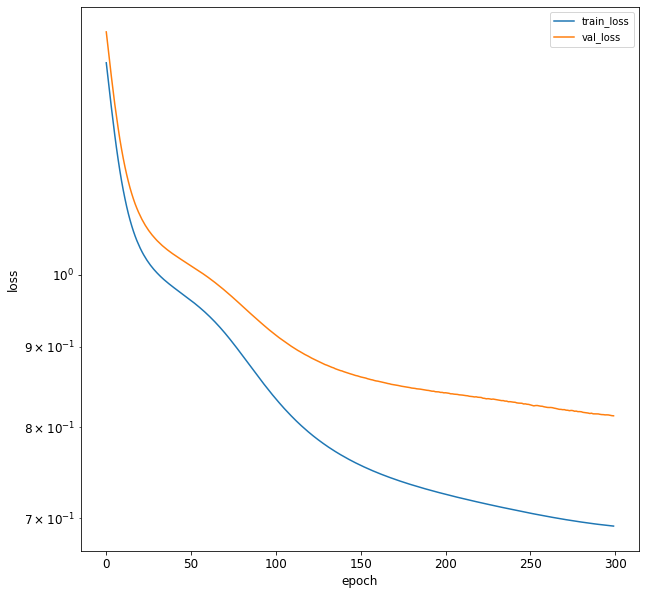

In [30]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [31]:
test = stlf_data.copy()[(stlf_data.index >= 8162) & (stlf_data.index<= 8373)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8162,1579.0,7.357452,91.902145,1.0,7.0,0.0,1677.0,1855.0,1928.0,1524.0,1543.0,1407.0,1746.333333
8163,1559.0,6.712452,94.205190,1.0,7.0,0.0,1646.0,1827.0,1920.0,1527.0,1521.0,1417.0,1716.250000
8164,1543.0,6.712452,94.205190,2.0,7.0,0.0,1623.0,1778.0,1881.0,1495.0,1494.0,1416.0,1688.083333
8165,1515.0,6.712452,94.205190,2.0,7.0,0.0,1583.0,1739.0,1848.0,1496.0,1480.0,1390.0,1660.333333
8166,1515.0,6.537452,94.688372,2.0,7.0,0.0,1579.0,1677.0,1855.0,1476.0,1457.0,1375.0,1632.000000
8167,1497.0,6.362452,95.171555,2.0,7.0,0.0,1559.0,1646.0,1827.0,1484.0,1456.0,1375.0,1604.500000
8168,1483.0,6.362452,95.171555,3.0,7.0,0.0,1543.0,1623.0,1778.0,1470.0,1433.0,1363.0,1579.916667
8169,1465.0,6.362452,95.171555,3.0,7.0,0.0,1515.0,1583.0,1739.0,1455.0,1417.0,1351.0,1557.083333
8170,1452.0,7.447452,88.419252,3.0,7.0,0.0,1515.0,1579.0,1677.0,1443.0,1403.0,1350.0,1538.333333
8171,1447.0,8.532452,81.666950,3.0,7.0,0.0,1497.0,1559.0,1646.0,1421.0,1413.0,1348.0,1521.750000


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 8162 to 8373
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


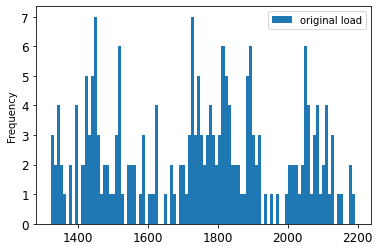

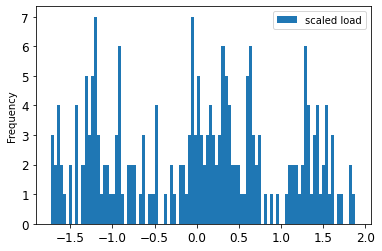

In [33]:
stlf_data[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=8162) & (test.index <= 8373)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [34]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8162,-0.664559,-0.804090,1.262235,-1.498364,1.114783,-0.340279,-0.285066,0.442591,0.735589,-1.094484,-0.964711,-1.388478,-0.009991,-0.917066
8163,-0.747348,-0.963314,1.388479,-1.498364,1.114783,-0.340279,-0.416058,0.320746,0.699752,-1.082509,-1.052884,-1.351080,-0.143970,-0.925345
8164,-0.813580,-0.963314,1.388479,-1.357685,1.114783,-0.340279,-0.513246,0.107518,0.525046,-1.210243,-1.161098,-1.354820,-0.269413,-0.962600
8165,-0.929485,-0.963314,1.388479,-1.357685,1.114783,-0.340279,-0.682268,-0.062195,0.377219,-1.206252,-1.217208,-1.452055,-0.393000,-1.082645
8166,-0.929485,-1.006514,1.414966,-1.357685,1.114783,-0.340279,-0.699170,-0.331995,0.408576,-1.286086,-1.309390,-1.508153,-0.519185,-1.169573
8167,-1.003995,-1.049714,1.441452,-1.357685,1.114783,-0.340279,-0.783682,-0.466895,0.283146,-1.254152,-1.313397,-1.508153,-0.641659,-1.239944
8168,-1.061947,-1.049714,1.441452,-1.217006,1.114783,-0.340279,-0.851290,-0.566982,0.063645,-1.310036,-1.405579,-1.553030,-0.751144,-1.252363
8169,-1.136458,-1.049714,1.441452,-1.217006,1.114783,-0.340279,-0.969606,-0.741046,-0.111061,-1.369912,-1.469705,-1.597908,-0.852834,-1.244084
8170,-1.190271,-0.781873,1.071315,-1.217006,1.114783,-0.340279,-0.969606,-0.758452,-0.388798,-1.417813,-1.525816,-1.601648,-0.936339,-1.227526
8171,-1.210968,-0.514031,0.701178,-1.217006,1.114783,-0.340279,-1.045666,-0.845485,-0.527666,-1.505631,-1.485737,-1.609128,-1.010194,-1.202689


In [35]:
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8162,-0.664559,-0.804090,1.262235,-1.498364,1.114783,-0.340279,-0.285066,0.442591,0.735589,-1.094484,-0.964711,-1.388478,-0.009991,-0.917066
8163,-0.747348,-0.963314,1.388479,-1.498364,1.114783,-0.340279,-0.416058,0.320746,0.699752,-1.082509,-1.052884,-1.351080,-0.143970,-0.925345
8164,-0.813580,-0.963314,1.388479,-1.357685,1.114783,-0.340279,-0.513246,0.107518,0.525046,-1.210243,-1.161098,-1.354820,-0.269413,-0.962600
8165,-0.929485,-0.963314,1.388479,-1.357685,1.114783,-0.340279,-0.682268,-0.062195,0.377219,-1.206252,-1.217208,-1.452055,-0.393000,-1.082645
8166,-0.929485,-1.006514,1.414966,-1.357685,1.114783,-0.340279,-0.699170,-0.331995,0.408576,-1.286086,-1.309390,-1.508153,-0.519185,-1.169573
8167,-1.003995,-1.049714,1.441452,-1.357685,1.114783,-0.340279,-0.783682,-0.466895,0.283146,-1.254152,-1.313397,-1.508153,-0.641659,-1.239944
8168,-1.061947,-1.049714,1.441452,-1.217006,1.114783,-0.340279,-0.851290,-0.566982,0.063645,-1.310036,-1.405579,-1.553030,-0.751144,-1.252363
8169,-1.136458,-1.049714,1.441452,-1.217006,1.114783,-0.340279,-0.969606,-0.741046,-0.111061,-1.369912,-1.469705,-1.597908,-0.852834,-1.244084
8170,-1.190271,-0.781873,1.071315,-1.217006,1.114783,-0.340279,-0.969606,-0.758452,-0.388798,-1.417813,-1.525816,-1.601648,-0.936339,-1.227526
8171,-1.210968,-0.514031,0.701178,-1.217006,1.114783,-0.340279,-1.045666,-0.845485,-0.527666,-1.505631,-1.485737,-1.609128,-1.010194,-1.202689


In [36]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.tail(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8269,-1.244084,-0.921348,0.831524,-1.076327,-0.952278,-0.340279,-1.125952,-1.054362,-0.671015,-1.489664,-1.593950,-1.437096,-1.117452,-1.699424
8270,-1.227526,-0.981828,0.870617,-1.076327,-0.952278,-0.340279,-1.214688,-1.023900,-0.805403,-1.457730,-1.473713,-1.410917,-1.169782,-1.641472
8271,-1.202689,-1.042309,0.909710,-1.076327,-0.952278,-0.340279,-1.286523,-1.032604,-0.930833,-1.493655,-1.469705,-1.433356,-1.209493,-1.600077
8272,-1.194410,-1.042309,0.909710,-0.935648,-0.952278,-0.340279,-1.299200,-1.071768,-1.051783,-1.525589,-1.469705,-1.395958,-1.238441,-1.496591
8273,-1.244084,-1.042309,0.909710,-0.935648,-0.952278,-0.340279,-1.290749,-1.197965,-1.132416,-1.501639,-1.409587,-1.395958,-1.265163,-1.355849


In [37]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
8162,-0.917066
8163,-0.925345
8164,-0.962600
8165,-1.082645
8166,-1.169573
...,...
8269,-1.699424
8270,-1.641472
8271,-1.600077
8272,-1.496591


In [38]:
X_test = test_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8162,-0.664559,-0.804090,1.262235,-1.498364,1.114783,-0.340279,-0.285066,0.442591,0.735589,-1.094484,-0.964711,-1.388478,-0.009991
8163,-0.747348,-0.963314,1.388479,-1.498364,1.114783,-0.340279,-0.416058,0.320746,0.699752,-1.082509,-1.052884,-1.351080,-0.143970
8164,-0.813580,-0.963314,1.388479,-1.357685,1.114783,-0.340279,-0.513246,0.107518,0.525046,-1.210243,-1.161098,-1.354820,-0.269413
8165,-0.929485,-0.963314,1.388479,-1.357685,1.114783,-0.340279,-0.682268,-0.062195,0.377219,-1.206252,-1.217208,-1.452055,-0.393000
8166,-0.929485,-1.006514,1.414966,-1.357685,1.114783,-0.340279,-0.699170,-0.331995,0.408576,-1.286086,-1.309390,-1.508153,-0.519185
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8269,-1.244084,-0.921348,0.831524,-1.076327,-0.952278,-0.340279,-1.125952,-1.054362,-0.671015,-1.489664,-1.593950,-1.437096,-1.117452
8270,-1.227526,-0.981828,0.870617,-1.076327,-0.952278,-0.340279,-1.214688,-1.023900,-0.805403,-1.457730,-1.473713,-1.410917,-1.169782
8271,-1.202689,-1.042309,0.909710,-1.076327,-0.952278,-0.340279,-1.286523,-1.032604,-0.930833,-1.493655,-1.469705,-1.433356,-1.209493
8272,-1.194410,-1.042309,0.909710,-0.935648,-0.952278,-0.340279,-1.299200,-1.071768,-1.051783,-1.525589,-1.469705,-1.395958,-1.238441


In [39]:
predictions = model.predict(X_test)
predictions

array([[1.02406740e-03],
       [9.21040773e-04],
       [8.23855400e-04],
       [7.60525465e-04],
       [7.04079866e-04],
       [6.88552856e-04],
       [6.56783581e-04],
       [6.28620386e-04],
       [6.49094582e-04],
       [6.76333904e-04],
       [6.45160675e-04],
       [6.41524792e-04],
       [6.37888908e-04],
       [6.22540712e-04],
       [6.22808933e-04],
       [6.44713640e-04],
       [6.61313534e-04],
       [6.92456961e-04],
       [6.70015812e-04],
       [7.24643469e-04],
       [8.61465931e-04],
       [1.14601851e-03],
       [1.79812312e-03],
       [3.74013186e-03],
       [7.05629587e-03],
       [1.59624815e-02],
       [3.46637070e-02],
       [5.92716336e-02],
       [1.26682699e-01],
       [1.57271475e-01],
       [1.66372925e-01],
       [1.87544286e-01],
       [3.38625669e-01],
       [4.93520916e-01],
       [5.11262953e-01],
       [3.87336314e-01],
       [3.59141707e-01],
       [3.97042900e-01],
       [1.81330562e-01],
       [1.52672678e-01],


In [40]:
feature=stlf_data.copy()[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    1739.542453
dtype: float64
Cons    242.149132
dtype: float64


In [41]:
load_mean=1739.542453
load_std=242.149132
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(112, 1)


In [42]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(112, 1)


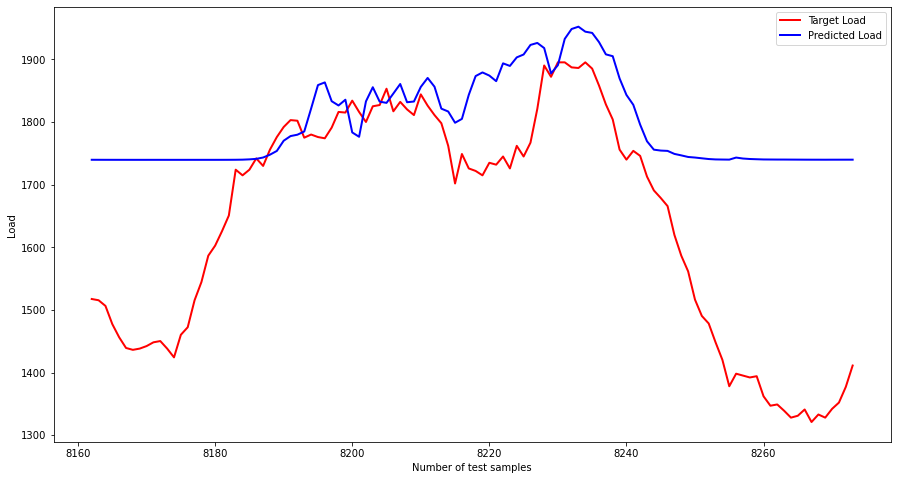

In [43]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [44]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

10.875806132822314


In [45]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100   -10.66079
dtype: float64


In [46]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
8162  151632.913530
8163  151432.290135
8164  150529.474041
8165  147620.338872
8166  145513.667329
...             ...
8269  132671.817225
8270  134076.497853
8271  135079.825308
8272  137588.083458
8273  140999.181407

[112 rows x 1 columns]


In [47]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+100
8162   49423.855605
8163   50308.066847
8164   54425.316178
8165   68825.277321
8166   80305.218132
...             ...
8269  169627.558050
8270  158296.231222
8271  150426.260829
8272  131622.288626
8273  108060.337968

[112 rows x 1 columns]
y_t+100    43963.10341
dtype: float64


In [48]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    209.673802
dtype: float64


In [49]:
a=np.array(rescaled_predicted_load)

In [50]:
for i in  range(0,102):
    b=a[i]
    print(b)

[1739.7904]
[1739.7655]
[1739.742]
[1739.7267]
[1739.713]
[1739.7092]
[1739.7015]
[1739.6947]
[1739.6997]
[1739.7063]
[1739.6987]
[1739.6979]
[1739.6969]
[1739.6932]
[1739.6932]
[1739.6986]
[1739.7026]
[1739.7102]
[1739.7047]
[1739.7179]
[1739.7511]
[1739.82]
[1739.9779]
[1740.4481]
[1741.2511]
[1743.4078]
[1747.9363]
[1753.895]
[1770.2186]
[1777.6256]
[1779.8296]
[1784.9562]
[1821.5404]
[1859.0481]
[1863.3444]
[1833.3357]
[1826.5083]
[1835.686]
[1783.4515]
[1776.5121]
[1833.0168]
[1855.6411]
[1832.6179]
[1830.6448]
[1845.6115]
[1860.7992]
[1831.6741]
[1832.8131]
[1856.0907]
[1870.4895]
[1856.4661]
[1821.4268]
[1816.8707]
[1798.9117]
[1805.0826]
[1843.4309]
[1873.4441]
[1879.2682]
[1874.2284]
[1865.3138]
[1893.7742]
[1889.6486]
[1903.2976]
[1907.9006]
[1923.2014]
[1926.3601]
[1918.1895]
[1877.7104]
[1890.8679]
[1932.8182]
[1948.6132]
[1952.3109]
[1944.3523]
[1942.3784]
[1927.6935]
[1908.1166]
[1905.1821]
[1869.6722]
[1843.3475]
[1827.58]
[1795.9352]
[1769.3313]
[1755.9468]
[1754.4896]
